In [248]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt

In [249]:
# helper functions
def kth_diag_indices(a, k):
    rows, cols = np.diag_indices_from(a)
    if k < 0:
        return rows[-k:], cols[:k]
    elif k > 0:
        return rows[:-k], cols[k:]
    else:
        return rows, cols

In [250]:
a = 3.8 * 1e-6

# length
j_num = 200
l_start = 0
l_end = 0.1
ls = np.linspace(start=l_start, stop=l_end, num=j_num)
h = (l_end - l_start) / len(ls)

# time
tau = 0.1
tau_start = 0
tau_end = 600
ts = np.arange(start=tau_start, stop=tau_end, step=tau)

# initial temperatures
T_plate_left = 100
T_plate_right = 0
us = np.zeros_like(ls)
for idx, l in enumerate(ls):
    if l < 0.05: us[idx] = T_plate_left
    else: us[idx] = T_plate_right

# constraints
T_left = 100
T_right = 0

# coefficients
alpha = a / (2 * h**2)
beta = 1 / tau + a / h**2
lamda = 1 / tau - a / h**2

In [251]:
# create A
A = np.zeros((j_num, j_num))

A[kth_diag_indices(A, k=-1)] = -alpha
A[kth_diag_indices(A, k=0)] = beta
A[kth_diag_indices(A, k=1)] = -alpha

Temperature delta smaller than 0.00001°C after 566s


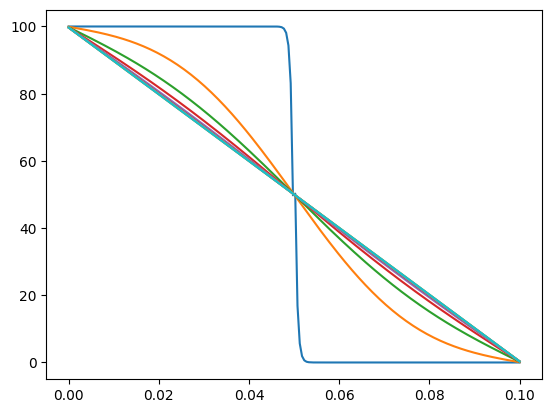

In [252]:
for idx_t, t in enumerate(ts):
    # create b
    b = np.zeros_like(us)
    
    # edge cases
    b[0] = alpha * (2 * T_plate_left + us[1]) + lamda * us[1]
    b[-1] = alpha * (2 * T_plate_right + us[-2]) + lamda * us[-2]
    
    for idx, _ in enumerate(b[1:-1]):
        idx += 1 # add offset
        b[idx] = alpha * (us[idx-1] + us[idx+1]) + lamda * us[idx]
    
    # solve Ax = b
    un = solve(A, b)

    # test for change
    tol = 1e-5
    if np.max(np.abs(un - us)) < tol:
        print(f"Temperature delta smaller than {tol:.5f}°C after {t:.0f}s")
        break
        
    us = un

    if idx_t % (int(len(ts) / 10)) == 0:
        plt.plot(ls, us)